In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#Load COVID-19 data (replace 'covid_data.csv' with your actual file)
data = pd.read_csv('D:\MLmini_projects\covid_19\worldometer_coronavirus_daily_data.csv')

In [3]:
#Assuming your data has 'date' and 'total_cases' columns 
# Preprocess the data
data['date'] = pd.to_datetime(data['date'])
data['days_since_start'] = (data['date'] - data['date'].min()).dt.days


In [4]:
data.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths',
       'days_since_start'],
      dtype='object')

In [5]:
# Select features and target
X = data[['days_since_start']]
y = data['cumulative_total_cases']

In [6]:



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model 

# Random Forest Regressor
model= RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")




Mean Squared Error: 15177307471710.875
R-squared: 0.021810351526508454


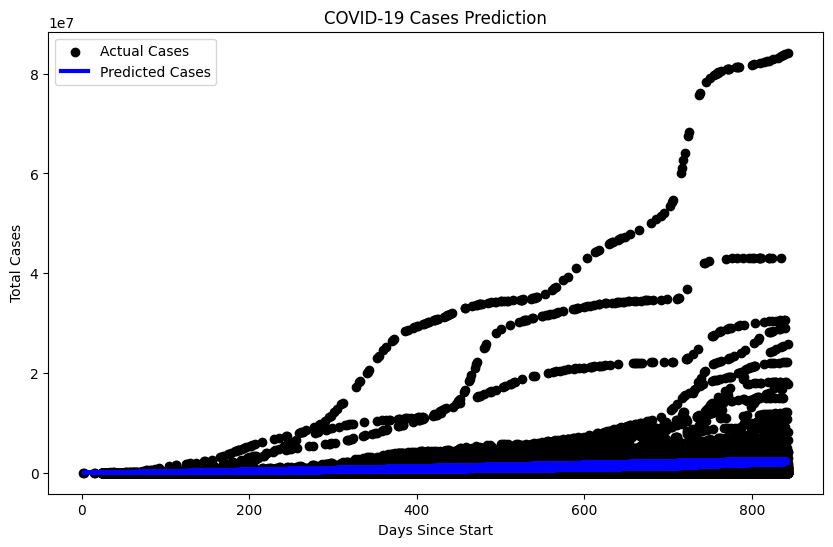

In [7]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Cases')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Cases')
plt.xlabel('Days Since Start')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.show()


Future Predictions:
Day 844: 2021399 cases
Day 845: 2021399 cases
Day 846: 2021399 cases
Day 847: 2021399 cases
Day 848: 2021399 cases
Day 849: 2021399 cases
Day 850: 2021399 cases
Day 851: 2021399 cases
Day 852: 2021399 cases
Day 853: 2021399 cases
Day 854: 2021399 cases
Day 855: 2021399 cases
Day 856: 2021399 cases
Day 857: 2021399 cases
Day 858: 2021399 cases
Day 859: 2021399 cases
Day 860: 2021399 cases
Day 861: 2021399 cases
Day 862: 2021399 cases
Day 863: 2021399 cases
Day 864: 2021399 cases
Day 865: 2021399 cases
Day 866: 2021399 cases
Day 867: 2021399 cases
Day 868: 2021399 cases
Day 869: 2021399 cases
Day 870: 2021399 cases
Day 871: 2021399 cases
Day 872: 2021399 cases
Day 873: 2021399 cases


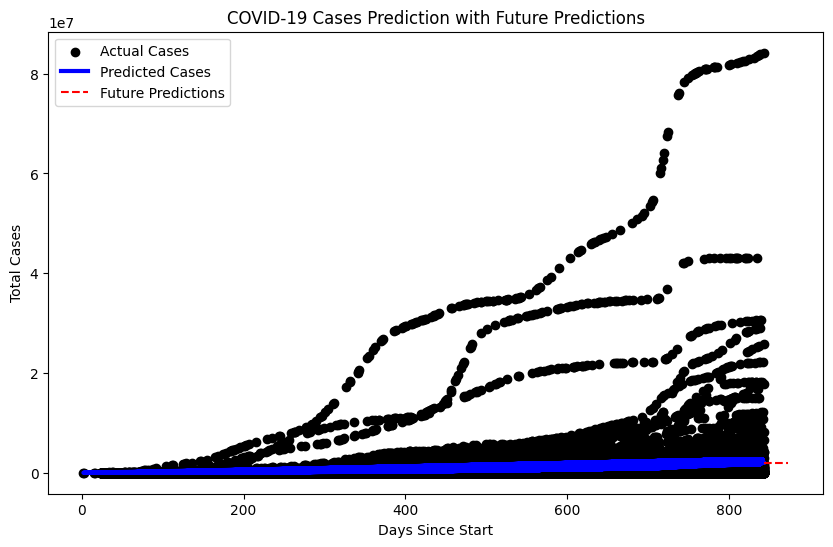

In [8]:

# Make future predictions (optional)
future_days = 30  # Predict for the next 30 days
last_day = data['days_since_start'].max()
future_dates = pd.DataFrame({'days_since_start': range(last_day + 1, last_day + future_days + 1)})
future_predictions = model.predict(future_dates)

print("\nFuture Predictions:")
for i, prediction in enumerate(future_predictions):
    print(f"Day {last_day + 1 + i}: {prediction:.0f} cases")

# Example of how to add the future predictions to the plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Cases')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Cases')
plt.plot(future_dates, future_predictions, color='red', linestyle='--', label='Future Predictions')
plt.xlabel('Days Since Start')
plt.ylabel('Total Cases')
plt.title('COVID-19 Cases Prediction with Future Predictions')
plt.legend()
plt.show()

In [10]:
import pickle

# Save the trained model
model_filename = "covid_rf_model.pkl"  # Ensure correct filename
with open(model_filename, "wb") as file:
    pickle.dump(model, file)


